In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os
import warnings
warnings.filterwarnings("ignore")


In [6]:
folder_path = r"C:\Users\Kaleb\OneDrive\Documents\AC\data\data"
file_name = "sierraleone-bumbuna.csv"
file_path = os.path.join(folder_path, file_name)

In [7]:
df = pd.read_csv(file_path)

In [8]:
print("🔹 First 5 rows:")
print(df.head())

🔹 First 5 rows:
          Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-10-30 00:01 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.1  0.0     0.0   
1  2021-10-30 00:02 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.2  0.0     0.0   
2  2021-10-30 00:03 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.2  0.0     0.0   
3  2021-10-30 00:04 -0.7  0.0 -0.8   0.0   0.0  21.9  99.3  0.0     0.0   
4  2021-10-30 00:05 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.3  0.0     0.0   

   WSstdev   WD  WDstdev    BP  Cleaning  Precipitation  TModA  TModB  \
0      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   
1      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   
2      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   
3      0.0  0.0      0.0  1002         0            0.1   22.3   22.6   
4      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   

   Comments  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN  


In [20]:
print("\n🔹 Summary statistics:")
print(df.describe())
print(df.isna().sum())


🔹 Summary statistics:
                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      201.957515     116.376337     113.720571     206.643095   
std       298.495150     218.652659     158.946032     300.896893   
min       -19.500000      -7.800000     -17.900000       0.000000   
25%        -2.800000      -0.300000      -3.800000       0.000000   
50%         0.300000      -0.100000      -0.100000       3.600000   
75%       362.400000     107.000000     224.700000     359.500000   
max      1499.000000     946.000000     892.000000    1507.000000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      198.114691      26.319394      79.448857       1.146113   
std       288.889073       4.398605      20.520775       1.239248   
min         0.000000      12.300000       9.900000       0.000000   
25%       

In [10]:
print("\n🔹 Missing values:")
print(df.isnull().sum())


🔹 Missing values:
Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64


In [11]:
if df['Comments'].isnull().sum() == len(df):
    df.drop(columns=['Comments'], inplace=True)
    print("\nℹ️ 'Comments' column dropped since it's entirely missing.")


ℹ️ 'Comments' column dropped since it's entirely missing.


In [12]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [13]:
df.set_index('Timestamp', inplace=True)

In [14]:
df_daily = df.resample('D').mean()

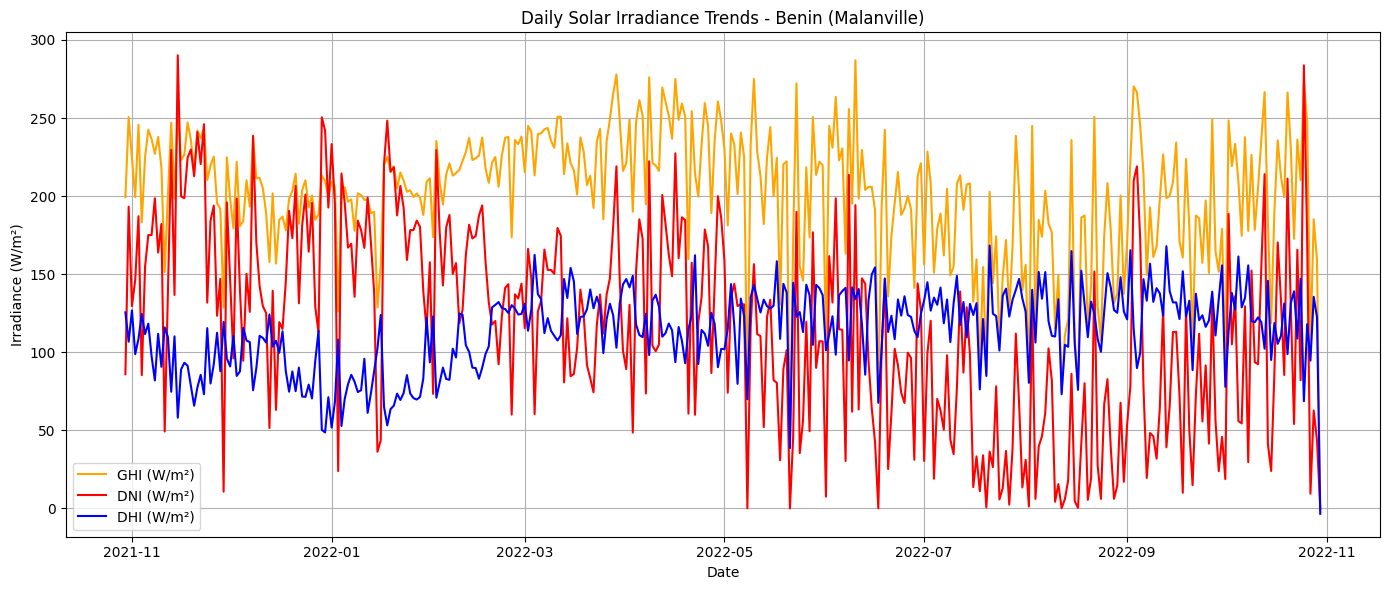

In [ ]:
plt.figure(figsize=(14, 6))
plt.plot(df_daily.index, df_daily['GHI'], label='GHI (W/m²)', color='orange')
plt.plot(df_daily.index, df_daily['DNI'], label='DNI (W/m²)', color='red')
plt.plot(df_daily.index, df_daily['DHI'], label='DHI (W/m²)', color='blue')
plt.title('Daily Solar Irradiance Trends - eda-sierraleone)')
plt.xlabel('Date')
plt.ylabel('Irradiance (W/m²)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

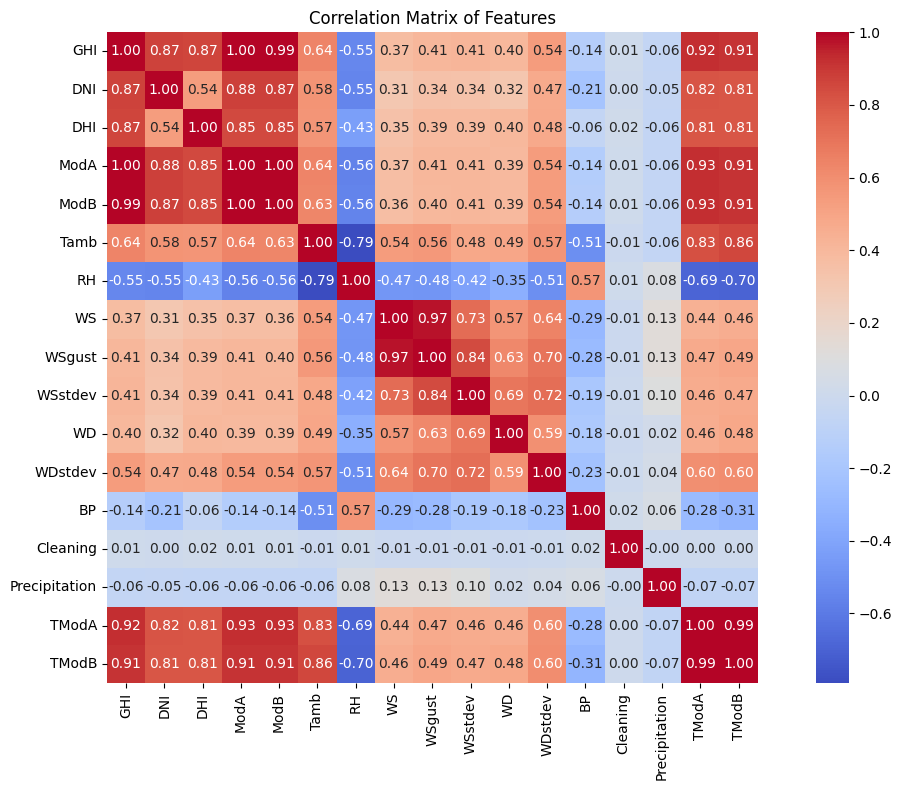

In [16]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix of Features')
plt.tight_layout()
plt.show()

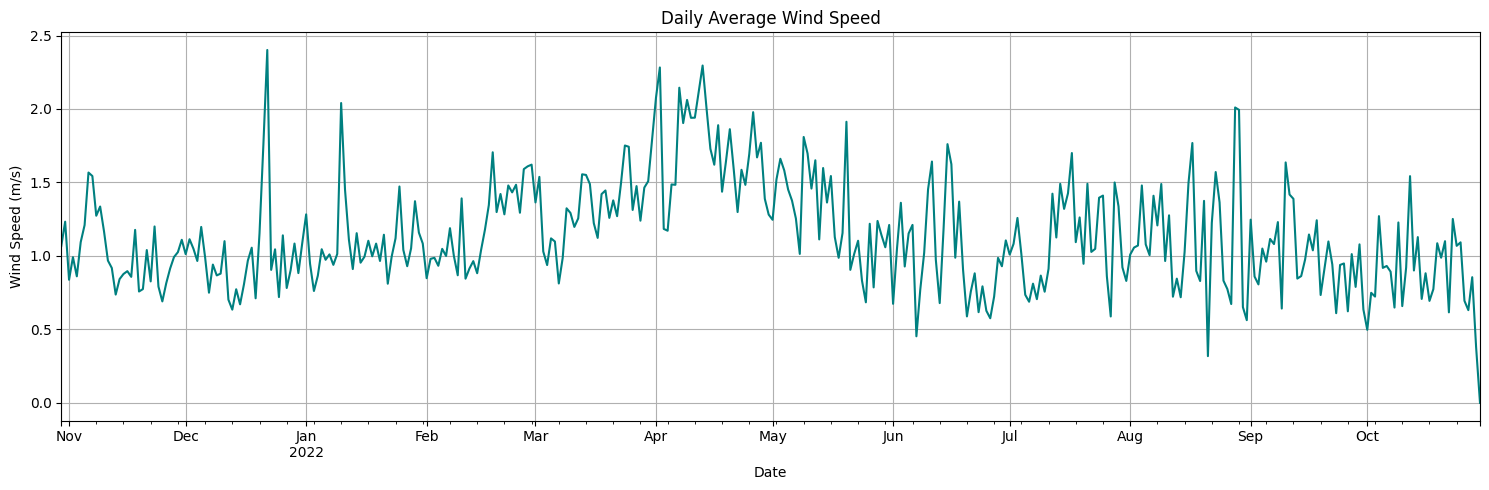

In [17]:
plt.figure(figsize=(15, 5))
df['WS'].resample('D').mean().plot(label='Wind Speed', color='teal')
plt.title("Daily Average Wind Speed")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Date")
plt.grid(True)
plt.tight_layout()
plt.show()

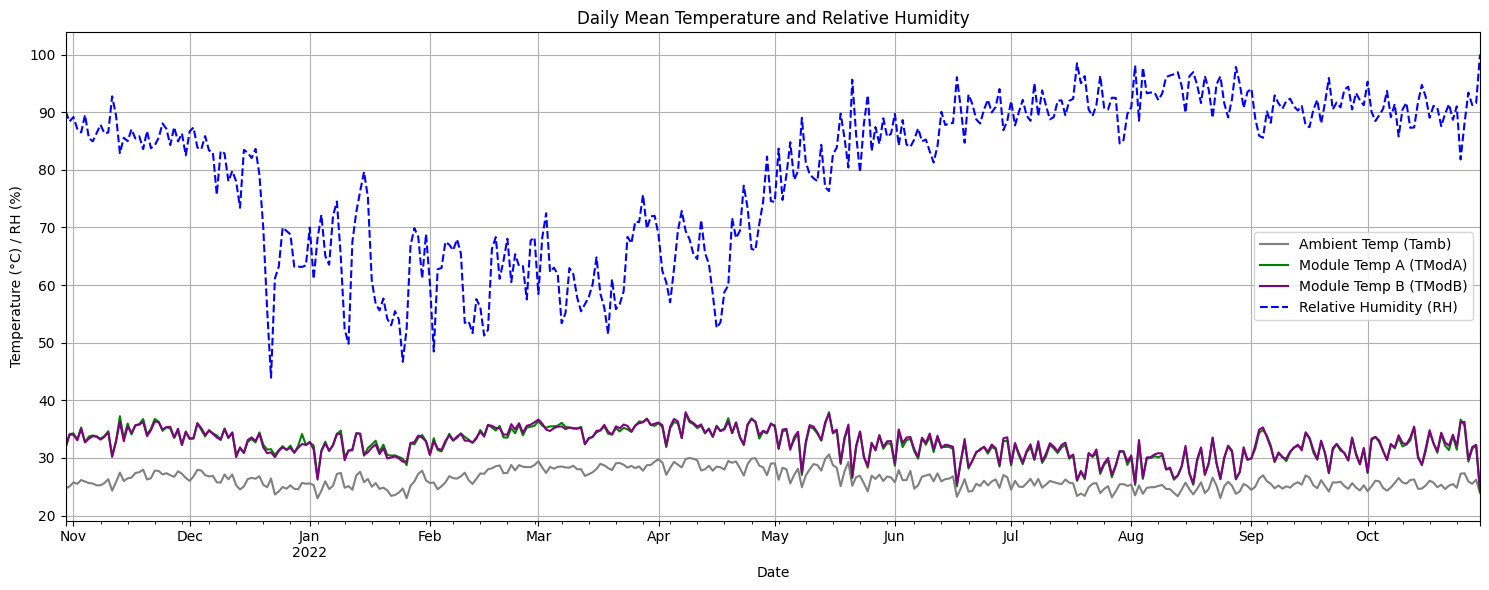

In [18]:
import matplotlib.pyplot as plt

# Temperature and RH over time (Daily mean)
plt.figure(figsize=(15, 6))

df['Tamb'].resample('D').mean().plot(label='Ambient Temp (Tamb)', color='gray')
df['TModA'].resample('D').mean().plot(label='Module Temp A (TModA)', color='green')
df['TModB'].resample('D').mean().plot(label='Module Temp B (TModB)', color='purple')
df['RH'].resample('D').mean().plot(label='Relative Humidity (RH)', color='blue', linestyle='--')

plt.title("Daily Mean Temperature and Relative Humidity")
plt.ylabel("Temperature (°C) / RH (%)")
plt.xlabel("Date")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


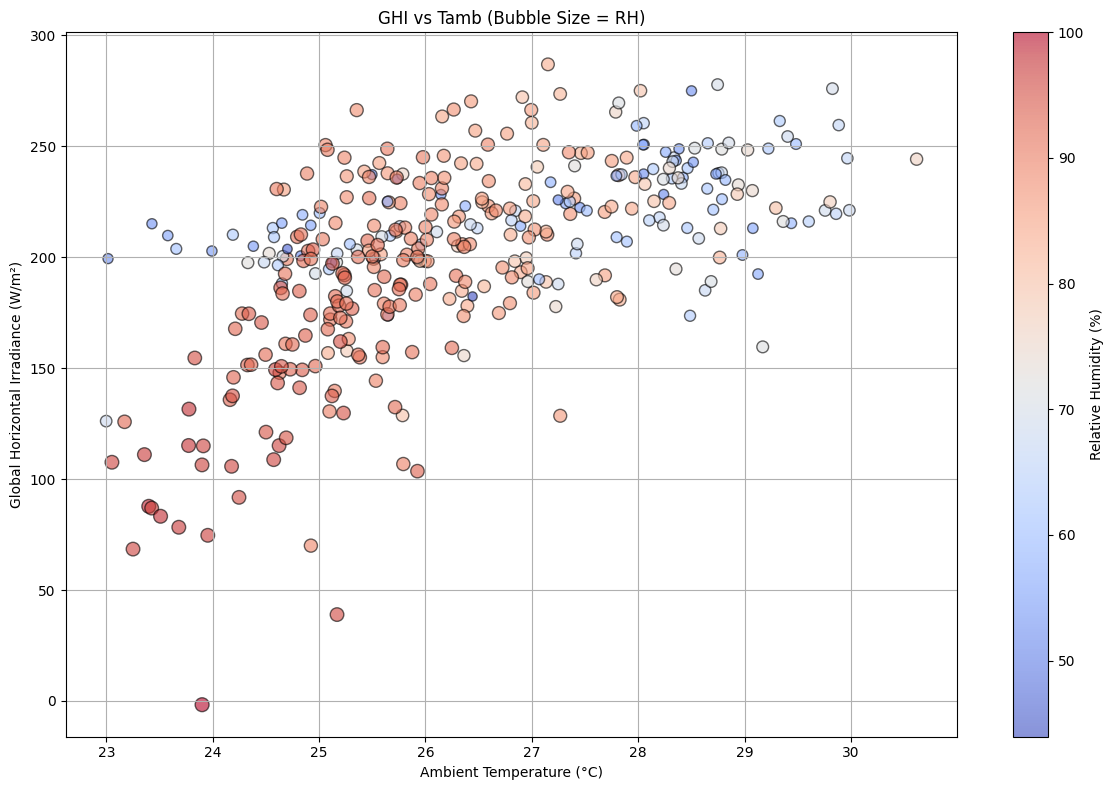

In [19]:
# Bubble Chart: GHI vs Tamb with bubble size = RH
plt.figure(figsize=(12, 8))

# Daily means to simplify and smooth the data
bubble_data = df[['GHI', 'Tamb', 'RH']].resample('D').mean().dropna()

plt.scatter(
    x=bubble_data['Tamb'],
    y=bubble_data['GHI'],
    s=bubble_data['RH'],          # Bubble size = RH
    c=bubble_data['RH'],          # Optional: color by RH
    cmap='coolwarm',
    alpha=0.6,
    edgecolors='black'
)

plt.title("GHI vs Tamb (Bubble Size = RH)")
plt.xlabel("Ambient Temperature (°C)")
plt.ylabel("Global Horizontal Irradiance (W/m²)")
plt.colorbar(label="Relative Humidity (%)")
plt.grid(True)
plt.tight_layout()
plt.show()
